# Big Mart Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.model_selection  import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing data
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

In [4]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
#cheking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# replacing the null values with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# replacing the null values with mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [12]:
df.shape

(8523, 12)

In [13]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [15]:
df.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [17]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [18]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [19]:
# Rearanging the data
df['Item_Fat_Content'].replace(['LF','Low Fat','low fat', 'reg','Regular'],['Low Fat','Low Fat','Low Fat','Regular','Regular'],inplace=True)

In [20]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [21]:
df['Outlet_Age']= df['Outlet_Establishment_Year'].apply(lambda year: 2021 - year)

In [22]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,34
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,19
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,17
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12


## Count Plot

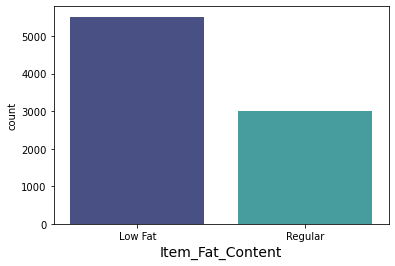

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content', data=df ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

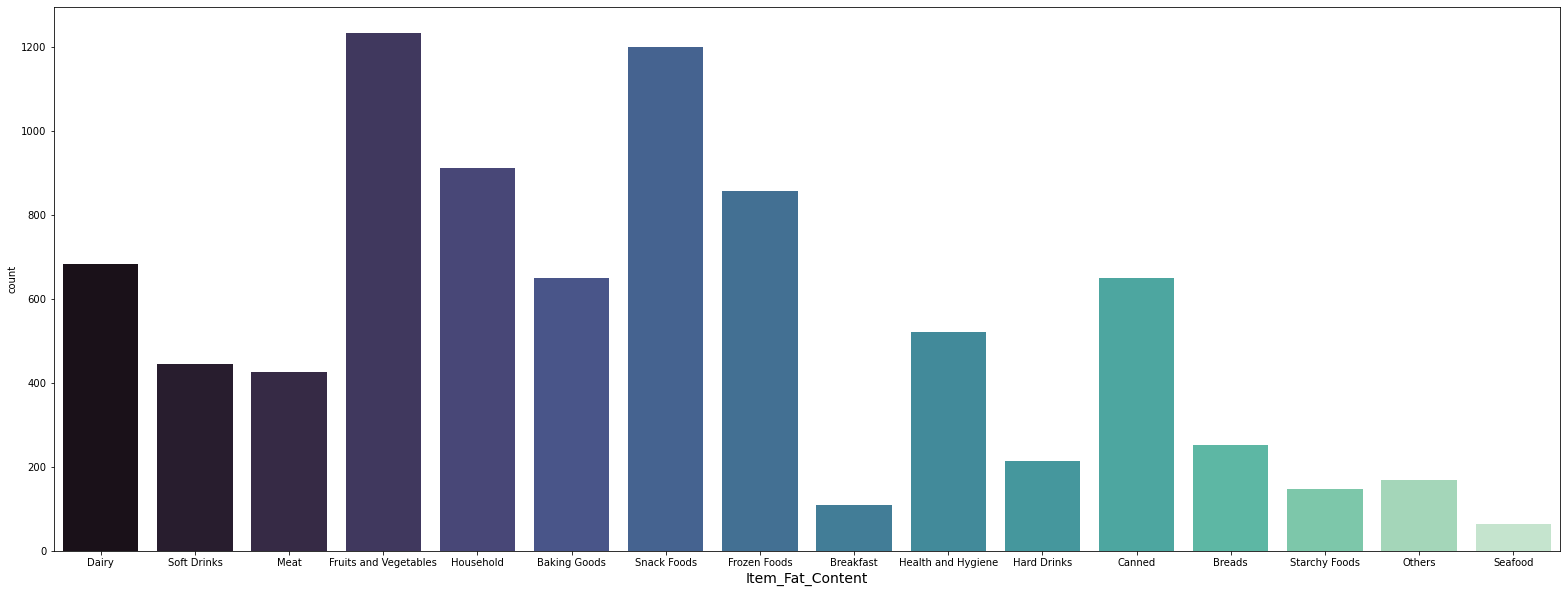

In [24]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type', data=df ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

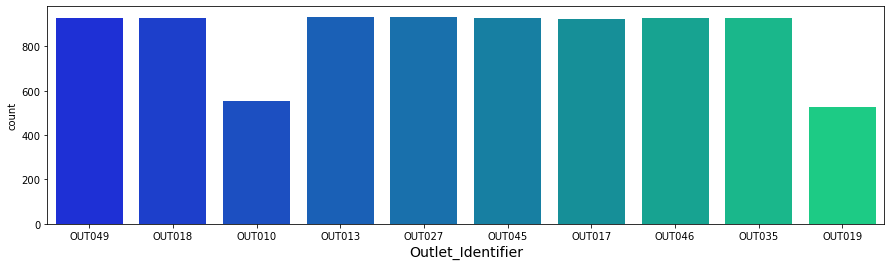

In [25]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier', data=df ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

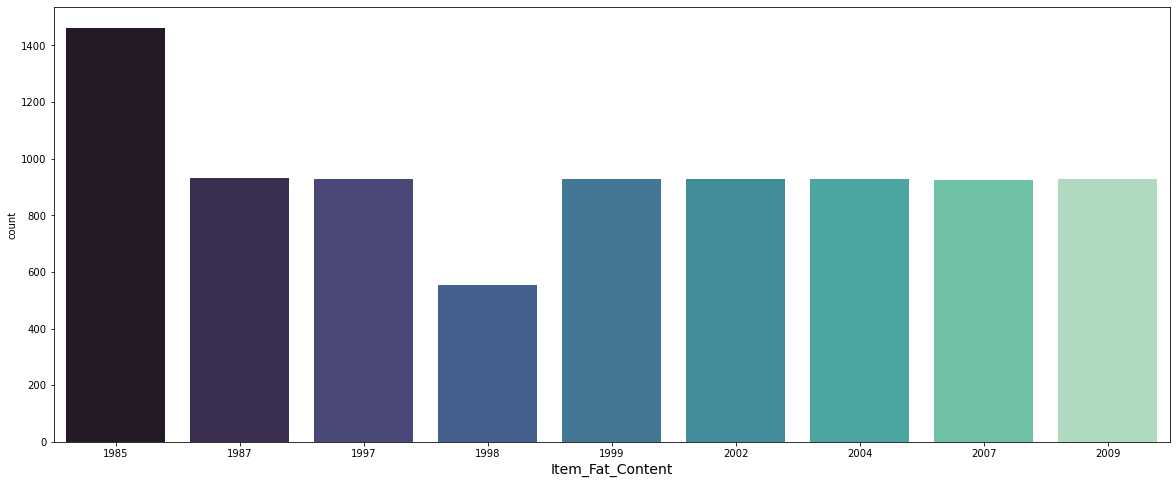

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(x='Outlet_Establishment_Year', data=df ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

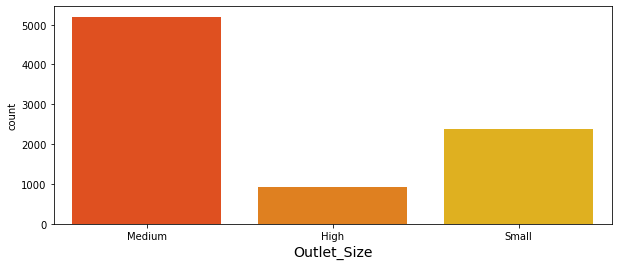

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size', data=df ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

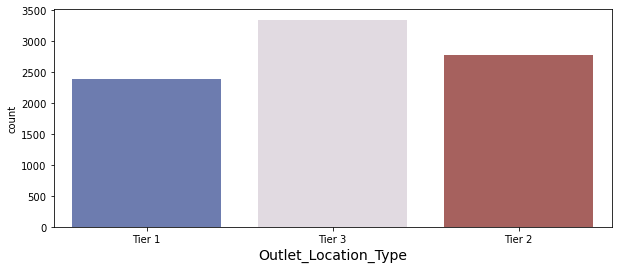

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type', data=df ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

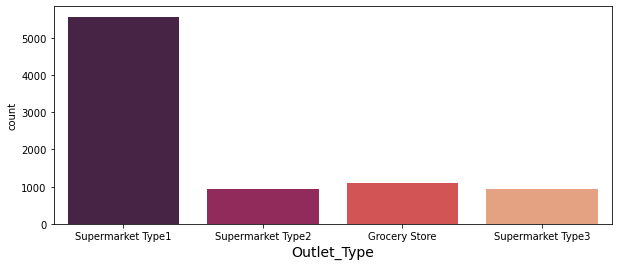

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type', data=df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

## PAIR PLOT

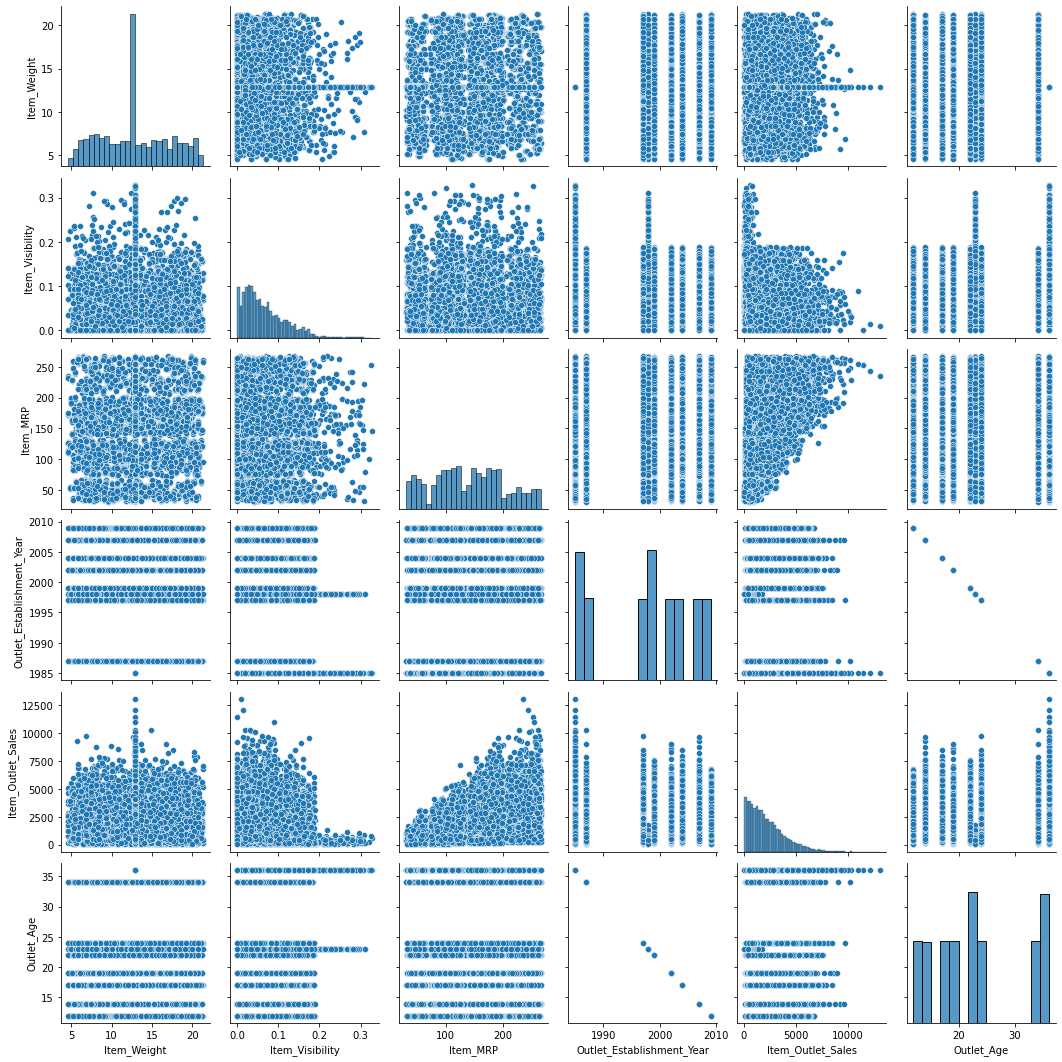

In [30]:
sns.pairplot(df)

## DIST PLOT

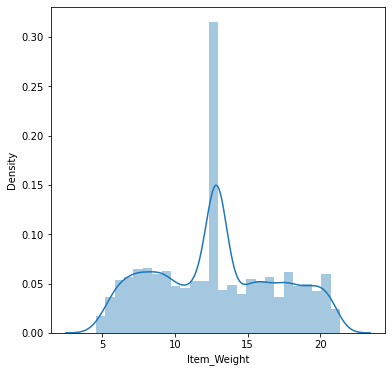

In [31]:
plt.figure(figsize=(6,6))
sns.distplot(df["Item_Weight"])
plt.show()

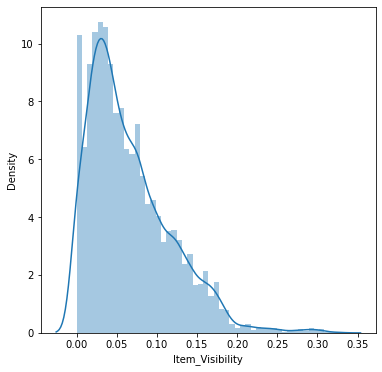

In [32]:
plt.figure(figsize=(6,6))
sns.distplot(df["Item_Visibility"])
plt.show()

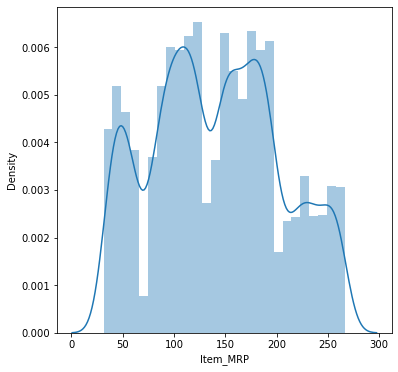

In [33]:
plt.figure(figsize=(6,6))
sns.distplot(df["Item_MRP"])
plt.show()

In [34]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Outlet_Age                   0.396641
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

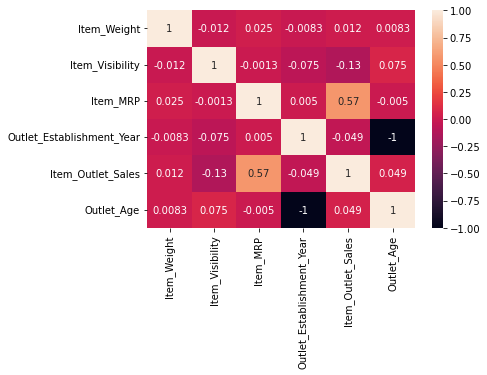

In [35]:
df_corr=df.corr()
sns.heatmap(df_corr,annot=True)
plt.show

In [36]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,34
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,19
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,17
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12


In [37]:
df.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year',],inplace=True)

In [38]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,12
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,23
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,34
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,19
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,17
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,12


In [39]:
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in Label:
    df[i] = le.fit_transform(df[i])
    
df.head()
# applying label encoder to convert object data into int type

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,22
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,12
2,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700,22
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,0,732.3800,23
4,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052,34


In [40]:
df['Outlet_Type'].unique()

array([1, 2, 0, 3])

In [41]:
cols = ['Item_Type']

In [42]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(df[cols])).astype('int64')

In [43]:
tr_oh.columns = OH_encoder.get_feature_names(cols)

In [44]:
tr_oh.index =df.index

In [45]:
tr_fe = pd.concat([df, tr_oh], axis=1)

In [46]:
tr_fe

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,22,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,12,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,Meat,141.6180,1,0,1,2097.2700,22,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.000000,Fruits and Vegetables,182.0950,1,2,0,732.3800,23,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,Household,53.8614,0,2,1,994.7052,34,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Snack Foods,214.5218,0,2,1,2778.3834,34,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.046982,Baking Goods,108.1570,1,1,1,549.2850,19,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,0.035186,Health and Hygiene,85.1224,2,1,1,1193.1136,17,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,1,0.145221,Snack Foods,103.1332,1,2,2,1845.5976,12,...,0,0,0,0,0,0,0,1,0,0


In [47]:
tr_fe.drop(columns='Item_Type',inplace=True)

In [48]:
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,22,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,12,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,22,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,1,2,0,732.3800,23,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,1,994.7052,34,0,...,0,0,0,1,0,0,0,0,0,0


Model Traning

In [49]:
X = tr_fe.drop(columns='Item_Outlet_Sales')
Y = tr_fe['Item_Outlet_Sales']

In [50]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [51]:
lm=LinearRegression()

In [52]:
lm.fit(X,Y)

LinearRegression()

In [53]:
print(lm.intercept_)

-224.08404157765835


In [54]:
print(lm.coef_)

[-7.91389288e-01  4.50345384e+01 -1.50241352e+03  1.55973987e+01
 -3.33653271e+02 -4.22623406e+02  9.97674873e+02 -1.23881646e+00
  9.22805650e-01  1.93767379e-01 -1.54339189e+01  2.92667509e+01
 -4.47135289e+01 -2.42558633e+01  2.87273631e+01  7.19471470e+00
 -2.70569118e+01 -3.91086816e+01 -3.51517447e+01 -7.93571486e+01
  1.61979672e+02 -1.16247599e+01 -1.54637764e+01  6.38812605e+01]


In [55]:
import statsmodels.formula.api as smf

In [56]:
sm=smf.ols(formula='Y~X',data=df).fit()

In [57]:
sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     382.1
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:43:15   Log-Likelihood:                -72497.
No. Observations:                8523   AIC:                         1.450e+05
Df Residuals:                    8499   BIC:                         1.452e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -210.9026     80.198     -2.630      0.009    -368.111     -53.694
X[0]          -0.7914      3.093     -0.256      0.798      -6.854       5.271
X[1]          45.0345     29.958      1.503      0.133     -13.691     103.760
X[2]       -1502.4135    259.940     -5.780      0.000   -2011.958    -992.869
X[3]          15.5974      0.210     74.350      0.000      15.186      16.009
X[4]        -333.6533     28.312    -11.785      0.000    -389.152    -278.154
X[5]        -422.6234     22.831    -18.511      0.000    -467.378    -377.869
X[6]         997.6749     19.109     52.209      0.000     960.216    1035.134
X[7]          -1.2388      1.604     -0.772      0.440      -4.383       1.905
X[8]         -12.2586     48.005     -0.255      0.798    -106.360      81.843
X[9]         -12.9876     73.415     -0.177      0.860    -156.900     130.925
X[10]        -28.6153    109.352     -0.262      0.794    -242.971     185.741
X[11]         16.0853     47.945      0.335      0.737     -77.898     110.069
X[12]        -57.8949     47.023     -1.231      0.218    -150.072      34.282
X[13]        -37.4373     42.746     -0.876      0.381    -121.231      46.356
X[14]         15.5459     37.317      0.417      0.677     -57.605      88.697
X[15]         -5.9867     79.531     -0.075      0.940    -161.887     149.913
X[16]        -40.2383     53.482     -0.752      0.452    -145.077      64.600
X[17]        -52.2901     42.792     -1.222      0.222    -136.173      31.593
X[18]        -48.3332     58.212     -0.830      0.406    -162.443      65.777
X[19]        -92.5386     89.083     -1.039      0.299    -267.162      82.085
X[20]        148.7983    141.927      1.048      0.294    -129.414     427.010
X[21]        -24.8062     37.441     -0.663      0.508     -98.199      48.587
X[22]        -28.6452     56.439     -0.508      0.612    -139.279      81.989
X[23]         50.6998     94.455      0.537      0.591    -134.455     235.855
==============================================================================
Omnibus:                      830.933   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1713.566
Skew:                           0.630   Prob(JB):                         0.00
Kurtosis:                       4.799   Cond. No.                     1.60e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.08e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [59]:
lm.fit(X_train,Y_train)

LinearRegression()

In [60]:
Y_pred=lm.predict(X_test)
Y_pred_train=lm.predict(X_train)

In [61]:
lm.score(X_train,Y_train)

0.5026478849198223

In [62]:
lm.score(X_test,Y_test)

0.5239956065573083

In [63]:
r2=r2_score(Y_test,Y_pred)
r2

0.5239956065573083

In [64]:
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=5)
scores  

array([0.48311246, 0.49831532, 0.4887682 , 0.5060486 , 0.5098139 ])

In [65]:
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=5).mean()
scores 

0.4972116947699837

In [66]:
mean_absolute_error(Y_test,Y_pred)

889.2632153390211

In [67]:
mean_squared_error(Y_test,Y_pred)

1406279.0518295192

# lasso

In [68]:
lasso=Lasso()

In [69]:
parameters={
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)

In [70]:
lasso_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [71]:
lasso_regressor.best_params_

{'alpha': 10}

In [72]:
print(lasso_regressor.best_score_)

0.49869362789897265


In [73]:
lasso_regressor.score(X_test,Y_test)

0.5238536530163884

In [74]:
LS=Lasso(alpha=10)

In [75]:
LS.fit(X_train,Y_train)

Lasso(alpha=10)

In [76]:
y_predict = LS.predict(X_test)

In [77]:
mean_absolute_error(Y_test,Y_pred)

889.2632153390211

In [78]:
mean_squared_error(Y_test,Y_pred)

1406279.0518295192

# GRADIENT BOOSTING

In [79]:
X = tr_fe.drop(columns='Item_Outlet_Sales')
Y = tr_fe['Item_Outlet_Sales']

In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [81]:
gbdt=GradientBoostingRegressor()

In [82]:
gbdt.fit(X_train,Y_train)

GradientBoostingRegressor()

In [83]:
Y_pred=gbdt.predict(X_test)

In [84]:
gbdt.score(X_train,Y_train)

0.6334470600870585

In [85]:
gbdt.score(X_test,Y_test)

0.6052482534372547

In [86]:
r2=r2_score(Y_test,Y_pred)
r2

0.6052482534372547

In [87]:
mean_absolute_error(Y_test,Y_pred)

756.3770978412622

In [88]:
mean_squared_error(Y_test,Y_pred)

1166231.067426353

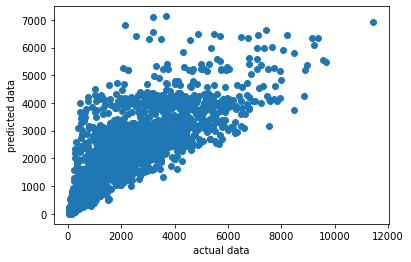

In [89]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# DECISION TREE MODEL

In [91]:
X = tr_fe.drop(columns='Item_Outlet_Sales')
Y = tr_fe['Item_Outlet_Sales']

In [92]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [93]:
Y_pred=dt.predict(X_test)

In [94]:
dt.score(X_train,Y_train)

1.0

In [95]:
dt.score(X_test,Y_test)

0.15094341125073552

In [96]:
r2=r2_score(Y_test,Y_pred)
r2

0.15094341125073552

In [97]:
mean_absolute_error(Y_test,Y_pred)

1112.7580074143593

In [98]:
mean_squared_error(Y_test,Y_pred)

2508402.2564167236

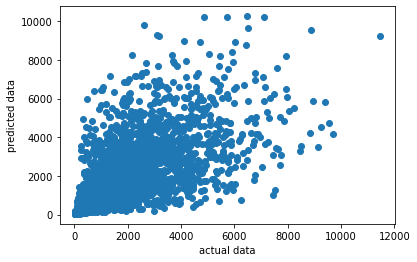

In [99]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# DECISION TREE WITH HYPER PARAMETER TUNING

In [127]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [128]:
dt1=DecisionTreeRegressor()

In [129]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':["mse", "friedman_mse", "mae", "poisson"]}

In [130]:
clf1=GridSearchCV(dt1,param_grid,cv=3,n_jobs=-1)

In [131]:
clf1.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [132]:
clf1.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 4}

In [133]:
Y_pred=clf1.predict(X_test)

In [134]:
clf1.score(X_train,Y_train)


0.6018427541850854

In [135]:
clf1.score(X_test,Y_test)

0.6075099531295594

In [136]:
r2=r2_score(Y_test,Y_pred)
r2

0.6075099531295594

In [137]:
mean_absolute_error(Y_test,Y_pred)

754.7625933388454

In [138]:
mean_squared_error(Y_test,Y_pred)

1159549.2364545553

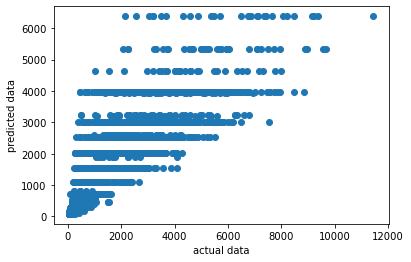

In [139]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# KNN

In [101]:
X = tr_fe.drop(columns='Item_Outlet_Sales')
Y = tr_fe['Item_Outlet_Sales']

In [102]:
scaler=StandardScaler()

In [103]:
X_scaled=scaler.fit_transform(X)

In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [105]:
knn=KNeighborsRegressor()

In [106]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [107]:
Y_pred=knn.predict(X_test)

In [108]:
knn.score(X_train,Y_train)

0.6535940180249262

In [109]:
knn.score(X_test,Y_test)

0.4716684321360969

In [110]:
r2=round(r2_score(Y_test,Y_pred),3)
r2

0.472

In [111]:
round(mean_absolute_error(Y_test,Y_pred),3)

909.036

In [112]:
round(mean_squared_error(Y_test,Y_pred),3)

1560871.342

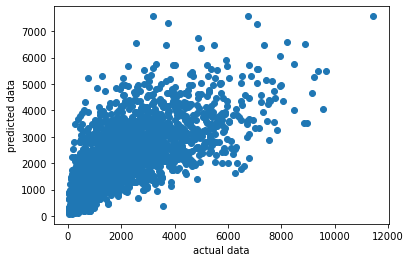

In [113]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# KNN MODEL USING HYPERPARAMETER TUNING

In [115]:
knn=KNeighborsRegressor()

In [116]:
param_grid=[
    {'algorithm':['kd_tree','brute','ball_tree'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
    }
]

In [117]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1)

In [118]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                          'leaf_size': [15, 18, 20],
                          'n_neighbors': [3, 5, 7, 13]}])

In [119]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [120]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [121]:
clf.score(X_train,Y_train)

0.6207379355708758

In [122]:
clf.score(X_test,Y_test)

0.4838174234809627

In [123]:
r2=round(r2_score(Y_test,Y_pred),3)
r2

0.484

In [124]:
round(mean_absolute_error(Y_test,Y_pred),3)

908.219

In [125]:
round(mean_squared_error(Y_test,Y_pred),3)

1524979.085

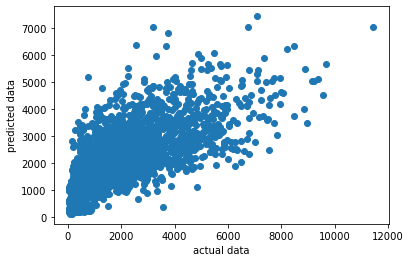

In [126]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# Test Dataset

In [140]:
df_test=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

In [141]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [142]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [143]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [144]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [145]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [146]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [147]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [148]:
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [149]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [150]:
df_test.shape

(5681, 11)

In [151]:
df_test['Item_Fat_Content'].replace(['LF','Low Fat','low fat', 'reg','Regular'],['Low Fat','Low Fat','Low Fat','Regular','Regular'],inplace=True)

In [152]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [153]:
df_test['Outlet_Age']= df_test['Outlet_Establishment_Year'].apply(lambda year: 2021 - year)

In [154]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,22
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,14
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,23
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,14
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,36
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,24
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,12
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,19
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,14


In [155]:
df_test.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],inplace=True)

In [156]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,22
1,8.300000,Regular,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1,14
2,14.600000,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store,23
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1,14
4,12.695633,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,36
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,Small,Tier 1,Supermarket Type1,24
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,Medium,Tier 3,Supermarket Type2,12
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,Medium,Tier 2,Supermarket Type1,19
5679,15.300000,Regular,0.000000,Canned,214.6218,Medium,Tier 2,Supermarket Type1,14


In [157]:
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in Label:
    df_test[i] = le.fit_transform(df_test[i])
    
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,20.750000,0,0.007565,Snack Foods,107.8622,1,0,1,22
1,8.300000,1,0.038428,Dairy,87.3198,1,1,1,14
2,14.600000,0,0.099575,Others,241.7538,1,2,0,23
3,7.315000,0,0.015388,Snack Foods,155.0340,1,1,1,14
4,12.695633,1,0.118599,Dairy,234.2300,1,2,3,36


In [158]:
cols = ['Item_Type']

In [159]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
te_oh = pd.DataFrame(OH_encoder.fit_transform(df_test[cols])).astype('int64')

In [160]:
te_oh.columns = OH_encoder.get_feature_names(cols)

In [161]:
te_oh.index =df_test.index

In [162]:
te_fe = pd.concat([df_test, te_oh], axis=1)

In [163]:
te_fe

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750000,0,0.007565,Snack Foods,107.8622,1,0,1,22,0,...,0,0,0,0,0,0,0,1,0,0
1,8.300000,1,0.038428,Dairy,87.3198,1,1,1,14,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,0,0.099575,Others,241.7538,1,2,0,23,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315000,0,0.015388,Snack Foods,155.0340,1,1,1,14,0,...,0,0,0,0,0,0,0,1,0,0
4,12.695633,1,0.118599,Dairy,234.2300,1,2,3,36,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,Snack Foods,141.3154,2,0,1,24,0,...,0,0,0,0,0,0,0,1,0,0
5677,7.600000,1,0.142991,Starchy Foods,169.1448,1,2,2,12,0,...,0,0,0,0,0,0,0,0,0,1
5678,10.000000,0,0.073529,Health and Hygiene,118.7440,1,1,1,19,0,...,0,0,1,0,0,0,0,0,0,0
5679,15.300000,1,0.000000,Canned,214.6218,1,1,1,14,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
te_fe.drop(columns='Item_Type',inplace=True)

In [165]:
te_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750000,0,0.007565,107.8622,1,0,1,22,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8.300000,1,0.038428,87.3198,1,1,1,14,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,0,0.099575,241.7538,1,2,0,23,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315000,0,0.015388,155.0340,1,1,1,14,0,0,...,0,0,0,0,0,0,0,1,0,0
4,12.695633,1,0.118599,234.2300,1,2,3,36,0,0,...,0,0,0,0,0,0,0,0,0,0


# Prediction on Test Dataset Using Random Forest

In [174]:
y_pred_test=clf1.predict(te_fe)

In [175]:
df3=pd.DataFrame(y_pred_test)
df3

,0
0,1528.122962
1,1528.122962
2,592.602108
3,2534.560625
4,6380.028500
...,...
5676,2006.918651
5677,2534.560625
5678,2006.918651
5679,3954.952992


In [176]:
df1_test=pd.concat([df_test,df3],axis=1)

In [177]:
df1_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,0
0,20.750000,0,0.007565,Snack Foods,107.8622,1,0,1,22,1528.122962
1,8.300000,1,0.038428,Dairy,87.3198,1,1,1,14,1528.122962
2,14.600000,0,0.099575,Others,241.7538,1,2,0,23,592.602108
3,7.315000,0,0.015388,Snack Foods,155.0340,1,1,1,14,2534.560625
4,12.695633,1,0.118599,Dairy,234.2300,1,2,3,36,6380.028500
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,Snack Foods,141.3154,2,0,1,24,2006.918651
5677,7.600000,1,0.142991,Starchy Foods,169.1448,1,2,2,12,2534.560625
5678,10.000000,0,0.073529,Health and Hygiene,118.7440,1,1,1,19,2006.918651
5679,15.300000,1,0.000000,Canned,214.6218,1,1,1,14,3954.952992


In [178]:
df1_test.rename(columns={0:"Predicted_Sales"},inplace=True)

In [179]:
df1_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Predicted_Sales
0,20.750000,0,0.007565,Snack Foods,107.8622,1,0,1,22,1528.122962
1,8.300000,1,0.038428,Dairy,87.3198,1,1,1,14,1528.122962
2,14.600000,0,0.099575,Others,241.7538,1,2,0,23,592.602108
3,7.315000,0,0.015388,Snack Foods,155.0340,1,1,1,14,2534.560625
4,12.695633,1,0.118599,Dairy,234.2300,1,2,3,36,6380.028500
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,Snack Foods,141.3154,2,0,1,24,2006.918651
5677,7.600000,1,0.142991,Starchy Foods,169.1448,1,2,2,12,2534.560625
5678,10.000000,0,0.073529,Health and Hygiene,118.7440,1,1,1,19,2006.918651
5679,15.300000,1,0.000000,Canned,214.6218,1,1,1,14,3954.952992


In [182]:
md=[lm,gbdt,dt,knn]
import pickle
filename="Big_mart_Dataset"
pickle.dump(md,open(filename,"wb"))

# Conclusion:
1. Conducted 3 models on Big_Mart dataset namely  Linear Regression, Gradient Boosting, Desicion Tree and Knn without and with Hyper Parameter tuning
2. It comes to a conclusion that Decision Tree with hyper Parameter Tuning is providing best score for Big_Mart dataset
3. r2_score=0.6075099531295594
4. Prediction is Done On Test Dataset using Desision Tree With hyper Parameter Tuning
